# Modeling

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
import viz

import wrangle_zillow
import wrangle_mall
from pydataset import data

np.set_printoptions(suppress=True)

# Clustering with the Iris Dataset

## Acquire

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.10,3.50,1.40,0.20,setosa
2,4.90,3.00,1.40,0.20,setosa
3,4.70,3.20,1.30,0.20,setosa
4,4.60,3.10,1.50,0.20,setosa
5,5.00,3.60,1.40,0.20,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


## Prepare

Using this lesson as a guide, perform clustering on the iris dataset.

In [6]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [7]:
train, validate, test = wrangle_zillow.split(df)

Train: 101 rows, 5 cols
Validate: 26 rows, 5 cols
Test: 23 rows, 5 cols


## Explore / Model/ Clustering

### 1 a. 
- Choose features other than the ones used in the lesson.

In [8]:
X = train[['petal_width', 'sepal_width']]

In [9]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1,
       0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2,
       2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1], dtype=int32)

In [10]:
#The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.
train['cluster'] = kmeans.predict(X)

### 1b.
- Visualize the results of your clustering.

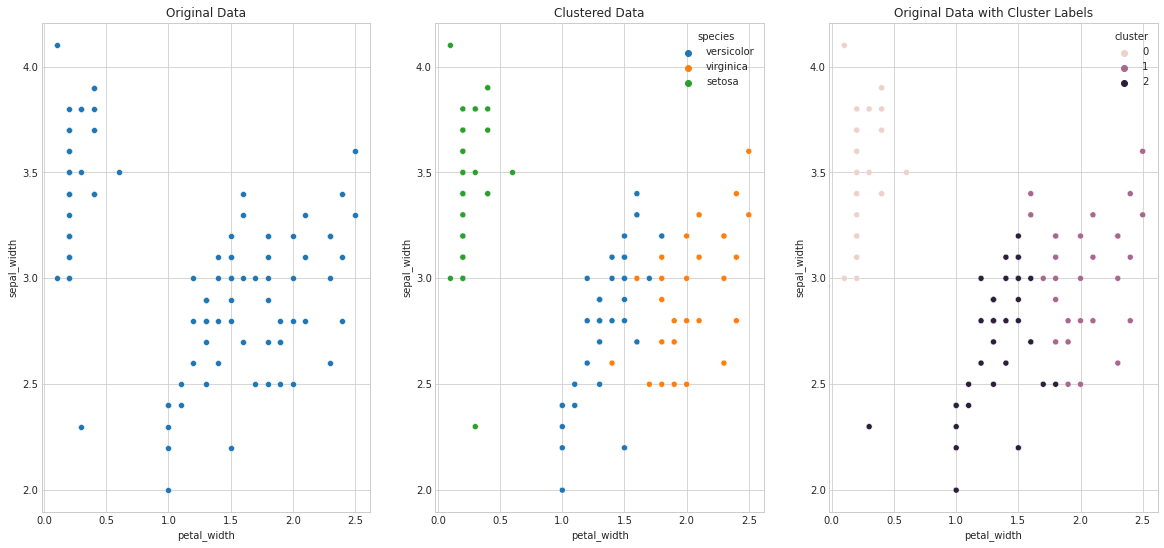

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='petal_width', y='sepal_width', data=train)
    plt.title('Original Data')
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='petal_width', y='sepal_width', hue='species', data=train)
    plt.title('Clustered Data')
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='petal_width', y='sepal_width', hue='cluster', data=train)
    plt.title('Original Data with Cluster Labels')

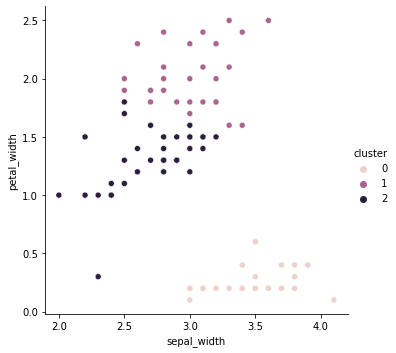

In [12]:
sns.relplot(data=train, y='petal_width', x='sepal_width', hue='cluster')

- Cluster Centers

In [13]:
kmeans.cluster_centers_

array([[0.25151515, 3.44848485],
       [2.04333333, 3.02      ],
       [1.31315789, 2.72368421]])

In [14]:
#These are the average values of each feature for each cluster. Putting them into a dataframe and labelling them will help illustrate:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,0.25,3.45
1,2.04,3.02
2,1.31,2.72


In [15]:
# Note that because of the way that the k-means algorithm works, these are the same numbers we would get from grouping by the cluster number and finding the average values for those features.
train.groupby('cluster')['petal_width','sepal_width'].mean()

,petal_width,sepal_width
cluster,,
0,0.25,3.45
1,2.04,3.02
2,1.31,2.72


Text(0.5, 1.0, 'Visualizing Cluster Centers')

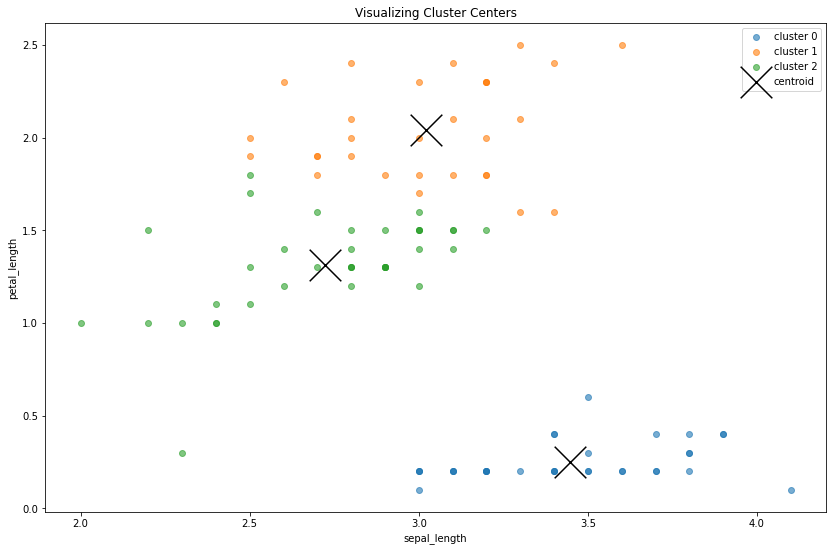

In [16]:
'''
Keep in mind these cluster centers are not data points from the dataset itself; they are the calculated average value for each group.

Let's visualize the cluster centers on top of our data too:
'''

plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

### 1c.
- Use the elbow method to visually select a good value for k.

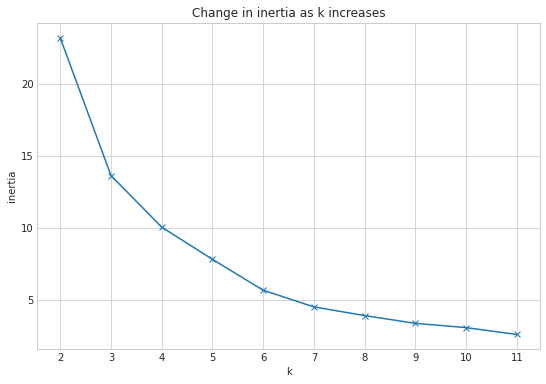

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

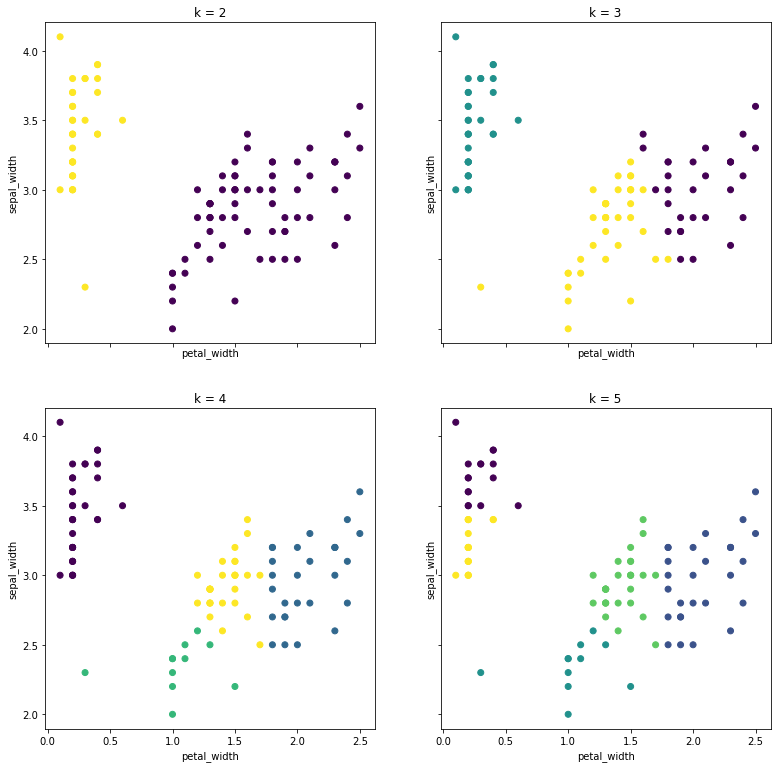

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal_width', ylabel='sepal_width')

### 1d. 
- Repeat the clustering, this time with 3 different features.

In [19]:
X = train[['petal_width', 'petal_length', 'sepal_width']]

In [20]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2,
       2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0], dtype=int32)

In [21]:
train['cluster_3'] = kmeans.predict(X)

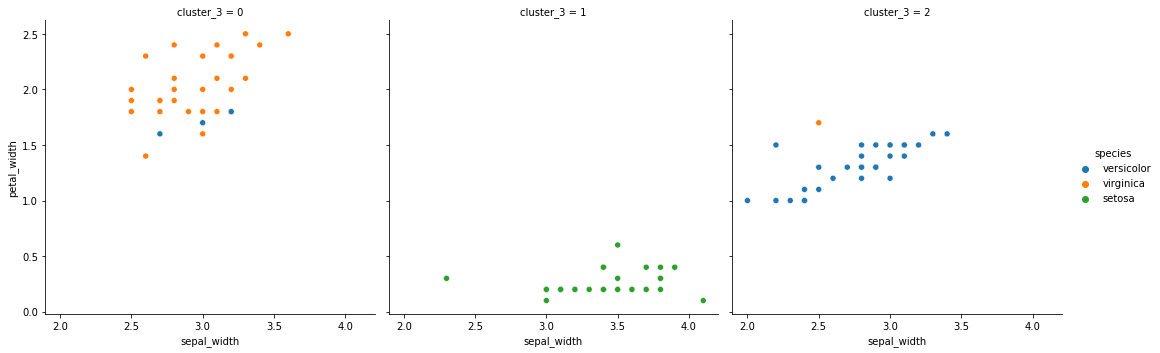

In [22]:
sns.relplot(data=train, y='petal_width', x='sepal_width', hue='species', col = 'cluster_3')

### 2. 
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset.
- Be sure to visualize your results!
- How does scaling impact the results of clustering?

In [23]:
df = wrangle_mall.get_mall_data()

Reading from csv file...


In [24]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### KMEANS BEFORE Scaling

In [41]:
X = df[['annual_income', 'spending_score', 'age']]

In [42]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)
df['cluster'] = kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [43]:
df['cluster'] = kmeans.predict(X)

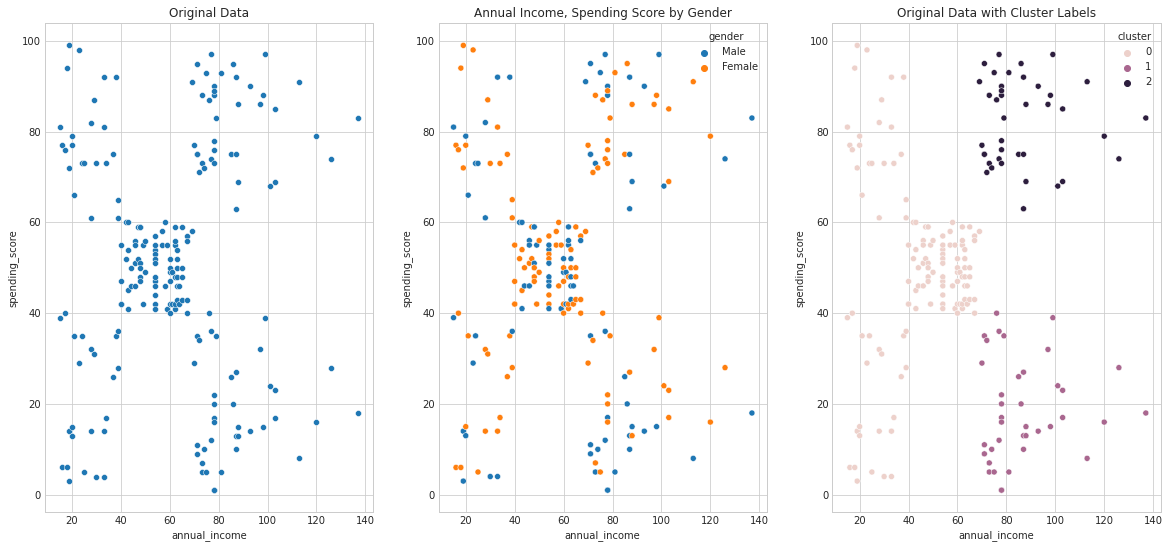

In [44]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='annual_income', y='spending_score', data=df)
    plt.title('Original Data')
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='annual_income', y='spending_score', hue='gender', data=df)
    plt.title('Annual Income, Spending Score by Gender')
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='annual_income', y='spending_score', hue='cluster', data=df)
    plt.title('Original Data with Cluster Labels')

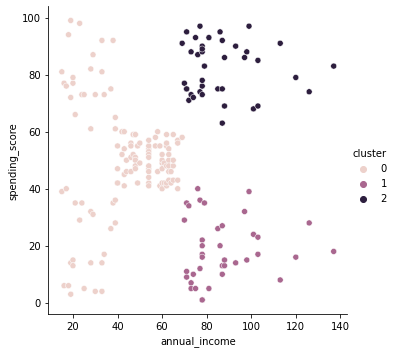

In [45]:
sns.relplot(data=df, x='annual_income', y='spending_score', hue='cluster')

In [46]:
kmeans.cluster_centers_

array([[44.15447154, 49.82926829, 40.32520325],
       [87.        , 18.63157895, 40.39473684],
       [86.53846154, 82.12820513, 32.69230769]])

In [47]:
#These are the average values of each feature for each cluster. Putting them into a dataframe and labelling them will help illustrate:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,annual_income,spending_score,age
0,44.15,49.83,40.33
1,87.00,18.63,40.39
2,86.54,82.13,32.69


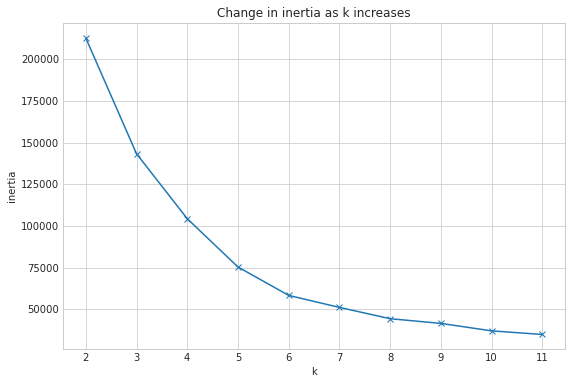

In [48]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

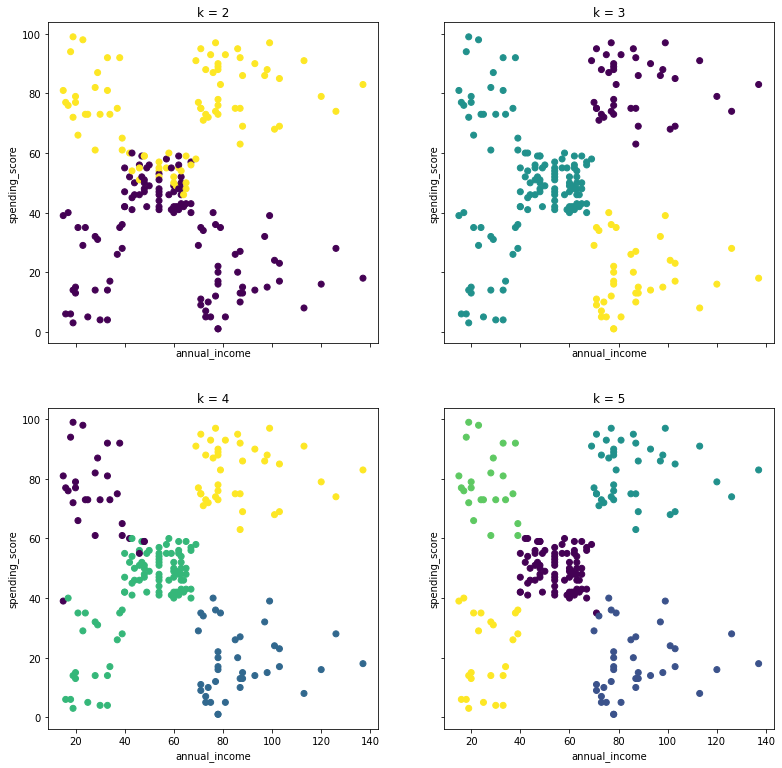

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='spending_score')

### KMEANS AFTER scaling

(<Figure size 1152x648 with 6 Axes>,
 array([[<AxesSubplot:title={'center':'age before scaling'}, xlabel='age', ylabel='count'>,
         <AxesSubplot:title={'center':'age after scaling with MinMaxScaler'}, xlabel='age', ylabel='count'>],
        [<AxesSubplot:title={'center':'annual_income before scaling'}, xlabel='annual_income', ylabel='count'>,
         <AxesSubplot:title={'center':'annual_income after scaling with MinMaxScaler'}, xlabel='annual_income', ylabel='count'>],
        [<AxesSubplot:title={'center':'spending_score before scaling'}, xlabel='spending_score', ylabel='count'>,
         <AxesSubplot:title={'center':'spending_score after scaling with MinMaxScaler'}, xlabel='spending_score', ylabel='count'>]],
       dtype=object))

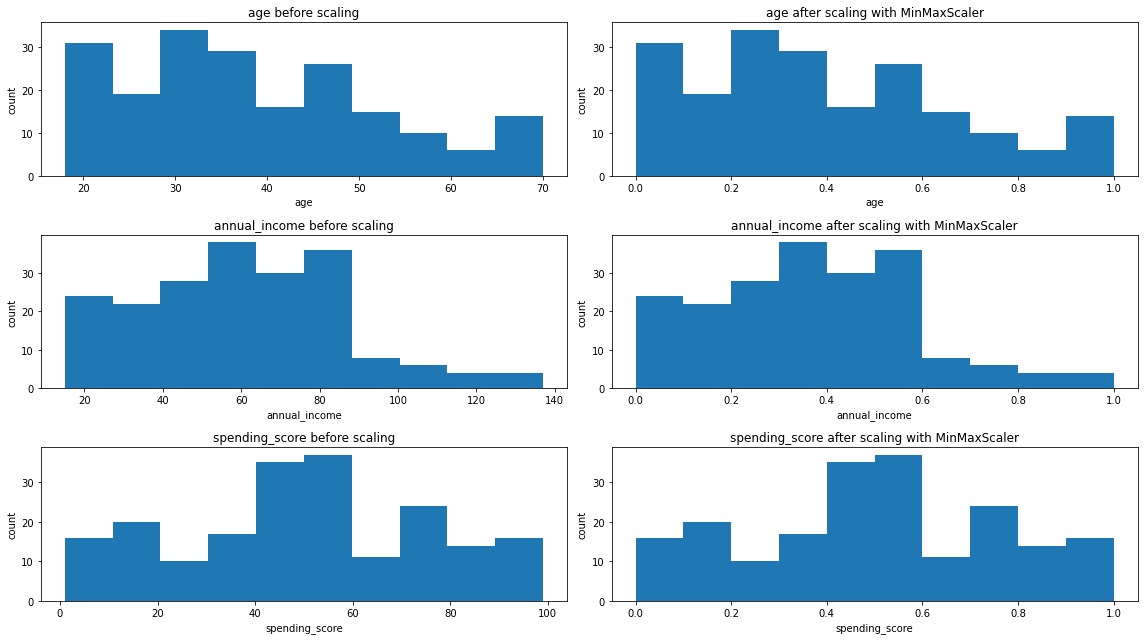

In [51]:
wrangle_mall.visualize_scaler(
    scaler=MinMaxScaler(),
    df=df,
    target_columns=['age','annual_income', 'spending_score'],
)

In [52]:
columns_to_scale = ['age','annual_income', 'spending_score']
df_scaled = df.copy()
    
scaler = MinMaxScaler()
    
scaler.fit(df[columns_to_scale])
    
df_scaled[columns_to_scale] = scaler.transform(df[columns_to_scale])

In [53]:
df_scaled.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,0.02,0.00,0.39,0
1,2,Male,0.06,0.00,0.82,0
2,3,Female,0.04,0.01,0.05,0
3,4,Female,0.10,0.01,0.78,0
4,5,Female,0.25,0.02,0.40,0


In [54]:
X = df_scaled[['age','annual_income', 'spending_score']]

In [56]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)
df['cluster'] = kmeans.predict(X)

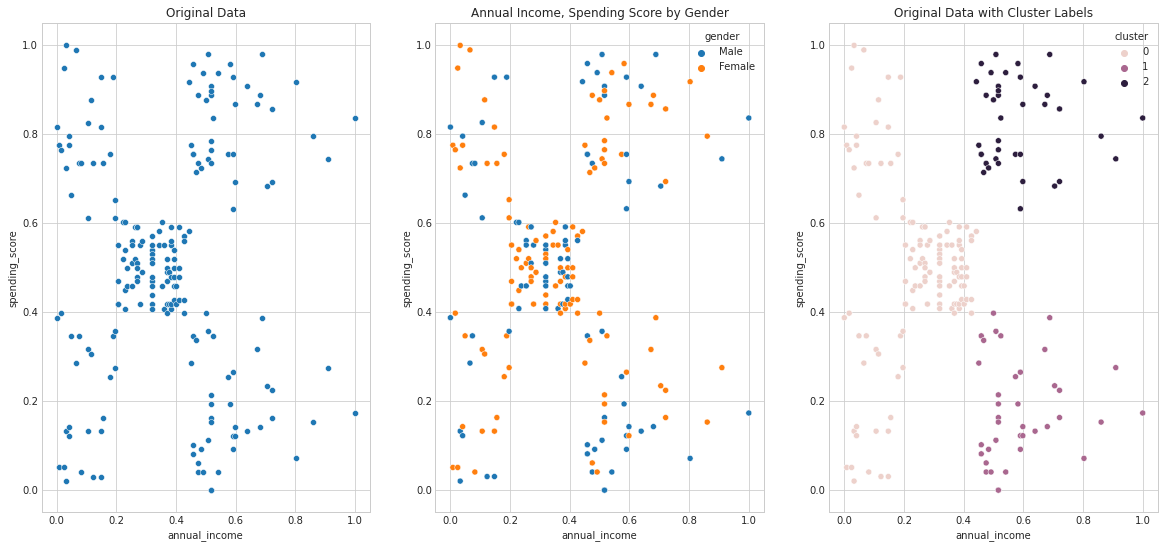

In [64]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='annual_income', y='spending_score', data=df_scaled)
    plt.title('Original Data')
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='annual_income', y='spending_score', hue='gender', data=df_scaled)
    plt.title('Annual Income, Spending Score by Gender')
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='annual_income', y='spending_score', hue='cluster', data=df_scaled)
    plt.title('Original Data with Cluster Labels')

Text(0.5, 1.0, 'Annual Income, Spending Score AFTER Scaling')

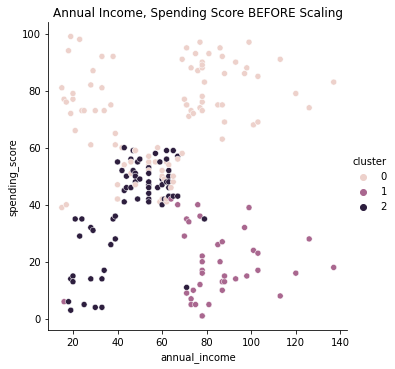

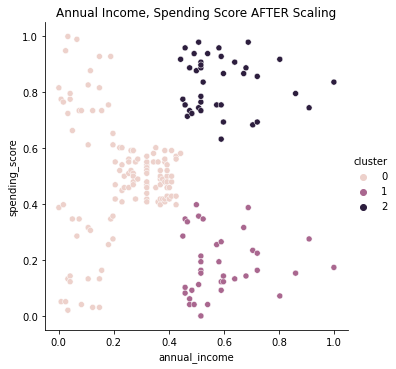

In [66]:

sns.relplot(data=df, x='annual_income', y='spending_score', hue='cluster')
plt.title('Annual Income, Spending Score BEFORE Scaling')

sns.relplot(data=df_scaled, x='annual_income', y='spending_score', hue='cluster')
plt.title('Annual Income, Spending Score AFTER Scaling')

### Compare k-means clustering results on scaled and unscaled data 
- (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). 
- You can show how the resulting clusters differ either with descriptive statistics or visually.

In [ ]:
#create a scaled dataframe

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()